In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
bank=pd.read_csv(r"/users/pawarbharath/downloads/bank.csv")

In [3]:
bank.shape

(11162, 17)

In [4]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
bank['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
bank['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [8]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [9]:
bank['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [10]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [14]:
Counter(bank.deposit)

Counter({'yes': 5289, 'no': 5873})

In [15]:
bank=bank.drop(['contact'],axis=1)




In [16]:
bank=bank.drop(['poutcome'],axis=1)

In [17]:
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,no


In [18]:
le_job=LabelEncoder()
le_marital=LabelEncoder()
le_education=LabelEncoder()
le_default=LabelEncoder()
le_housing=LabelEncoder()
le_loan=LabelEncoder()
le_month=LabelEncoder()
le_deposit=LabelEncoder()

In [19]:
bank['mod_job']=le_job.fit_transform(bank['job'])
bank['mod_marital']=le_marital.fit_transform(bank['marital'])
bank['mod_education']=le_education.fit_transform(bank['education'])
bank['mod_default']=le_default.fit_transform(bank['default'])
bank['mod_housing']=le_housing.fit_transform(bank['housing'])
bank['mod_loan']=le_loan.fit_transform(bank['loan'])
bank['mod_month']=le_month.fit_transform(bank['month'])
bank['mod_deposit']=le_deposit.fit_transform(bank['deposit'])

In [20]:
bank

,age,job,marital,education,default,balance,housing,loan,day,month,...,previous,deposit,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month,mod_deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,...,0,yes,0,1,1,0,1,0,8,1
1,56,admin.,married,secondary,no,45,no,no,5,may,...,0,yes,0,1,1,0,0,0,8,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,...,0,yes,9,1,1,0,1,0,8,1
3,55,services,married,secondary,no,2476,yes,no,5,may,...,0,yes,7,1,1,0,1,0,8,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,...,0,yes,0,1,2,0,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,...,0,no,1,2,0,0,1,0,0,0
11158,39,services,married,secondary,no,733,no,no,16,jun,...,0,no,7,1,1,0,0,0,6,0
11159,32,technician,single,secondary,no,29,no,no,19,aug,...,0,no,9,2,1,0,0,0,1,0
11160,43,technician,married,secondary,no,0,no,yes,8,may,...,5,no,9,1,1,0,0,1,8,0


In [21]:
bank=bank.drop(['job','marital','education','default','housing','loan','month','deposit'],axis=1)

In [22]:
bank

,age,balance,day,duration,campaign,pdays,previous,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month,mod_deposit
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,8,1
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,8,1
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,8,1
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,8,1
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,2,0,0,1,0,0,0
11158,39,733,16,83,4,-1,0,7,1,1,0,0,0,6,0
11159,32,29,19,156,2,-1,0,9,2,1,0,0,0,1,0
11160,43,0,8,9,2,172,5,9,1,1,0,0,1,8,0


In [23]:
bank.isnull().sum()

age              0
balance          0
day              0
duration         0
campaign         0
pdays            0
previous         0
mod_job          0
mod_marital      0
mod_education    0
mod_default      0
mod_housing      0
mod_loan         0
mod_month        0
mod_deposit      0
dtype: int64

In [24]:
x=bank.iloc[:,0:14]

In [25]:
x

,age,balance,day,duration,campaign,pdays,previous,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,8
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,8
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,8
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,8
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,2,0,0,1,0,0
11158,39,733,16,83,4,-1,0,7,1,1,0,0,0,6
11159,32,29,19,156,2,-1,0,9,2,1,0,0,0,1
11160,43,0,8,9,2,172,5,9,1,1,0,0,1,8


In [26]:
y=bank.iloc[:,-1]

In [27]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: mod_deposit, Length: 11162, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [29]:
x_train.shape

(8929, 14)

In [30]:
y_test.shape

(2233,)

In [31]:
x_test.shape

(2233, 14)

In [32]:
x_test

,age,balance,day,duration,campaign,pdays,previous,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month
5527,65,744,5,182,1,-1,0,5,0,1,0,0,0,5
4541,38,1627,16,1323,9,-1,0,1,1,1,0,0,0,6
1964,35,4963,14,456,1,300,1,1,2,1,0,1,0,8
5007,47,8229,8,784,2,-1,0,1,1,1,0,0,0,1
8928,35,1473,12,84,3,-1,0,9,1,2,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,46,926,7,385,5,-1,0,10,1,1,0,0,0,5
5544,49,230,8,96,1,-1,0,9,1,0,0,1,0,8
10749,53,431,5,55,1,328,1,9,1,2,0,1,0,8
3881,48,926,12,504,2,178,10,10,1,1,0,0,0,1


In [33]:
model = DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth =40 , min_samples_split = 20,min_samples_leaf = 2, max_features = 13)

In [34]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=40, max_features=13, min_samples_leaf=2,
                       min_samples_split=20, splitter='random')

In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1166
           1       0.77      0.77      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

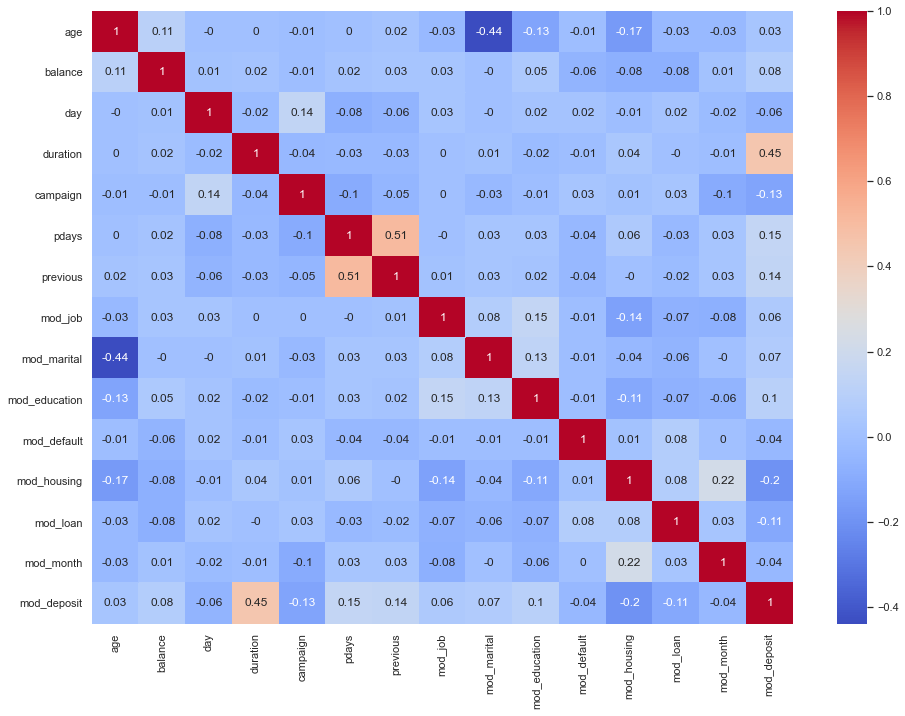

In [225]:
corelmatrix=bank.corr().round(2)
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,11.27)})
sns.heatmap(data=corelmatrix,annot=True,cmap="coolwarm")

In [40]:
corelmatrix

,age,balance,day,duration,campaign,pdays,previous,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month,mod_deposit
age,1.00,0.11,-0.00,0.00,-0.01,0.00,0.02,-0.03,-0.44,-0.13,-0.01,-0.17,-0.03,-0.03,0.03
balance,0.11,1.00,0.01,0.02,-0.01,0.02,0.03,0.03,-0.00,0.05,-0.06,-0.08,-0.08,0.01,0.08
day,-0.00,0.01,1.00,-0.02,0.14,-0.08,-0.06,0.03,-0.00,0.02,0.02,-0.01,0.02,-0.02,-0.06
duration,0.00,0.02,-0.02,1.00,-0.04,-0.03,-0.03,0.00,0.01,-0.02,-0.01,0.04,-0.00,-0.01,0.45
campaign,-0.01,-0.01,0.14,-0.04,1.00,-0.10,-0.05,0.00,-0.03,-0.01,0.03,0.01,0.03,-0.10,-0.13
pdays,0.00,0.02,-0.08,-0.03,-0.10,1.00,0.51,-0.00,0.03,0.03,-0.04,0.06,-0.03,0.03,0.15
previous,0.02,0.03,-0.06,-0.03,-0.05,0.51,1.00,0.01,0.03,0.02,-0.04,-0.00,-0.02,0.03,0.14
mod_job,-0.03,0.03,0.03,0.00,0.00,-0.00,0.01,1.00,0.08,0.15,-0.01,-0.14,-0.07,-0.08,0.06
mod_marital,-0.44,-0.00,-0.00,0.01,-0.03,0.03,0.03,0.08,1.00,0.13,-0.01,-0.04,-0.06,-0.00,0.07
mod_education,-0.13,0.05,0.02,-0.02,-0.01,0.03,0.02,0.15,0.13,1.00,-0.01,-0.11,-0.07,-0.06,0.10


In [41]:
bank

,age,balance,day,duration,campaign,pdays,previous,mod_job,mod_marital,mod_education,mod_default,mod_housing,mod_loan,mod_month,mod_deposit
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,8,1
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,8,1
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,8,1
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,8,1
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,2,0,0,1,0,0,0
11158,39,733,16,83,4,-1,0,7,1,1,0,0,0,6,0
11159,32,29,19,156,2,-1,0,9,2,1,0,0,0,1,0
11160,43,0,8,9,2,172,5,9,1,1,0,0,1,8,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Defa

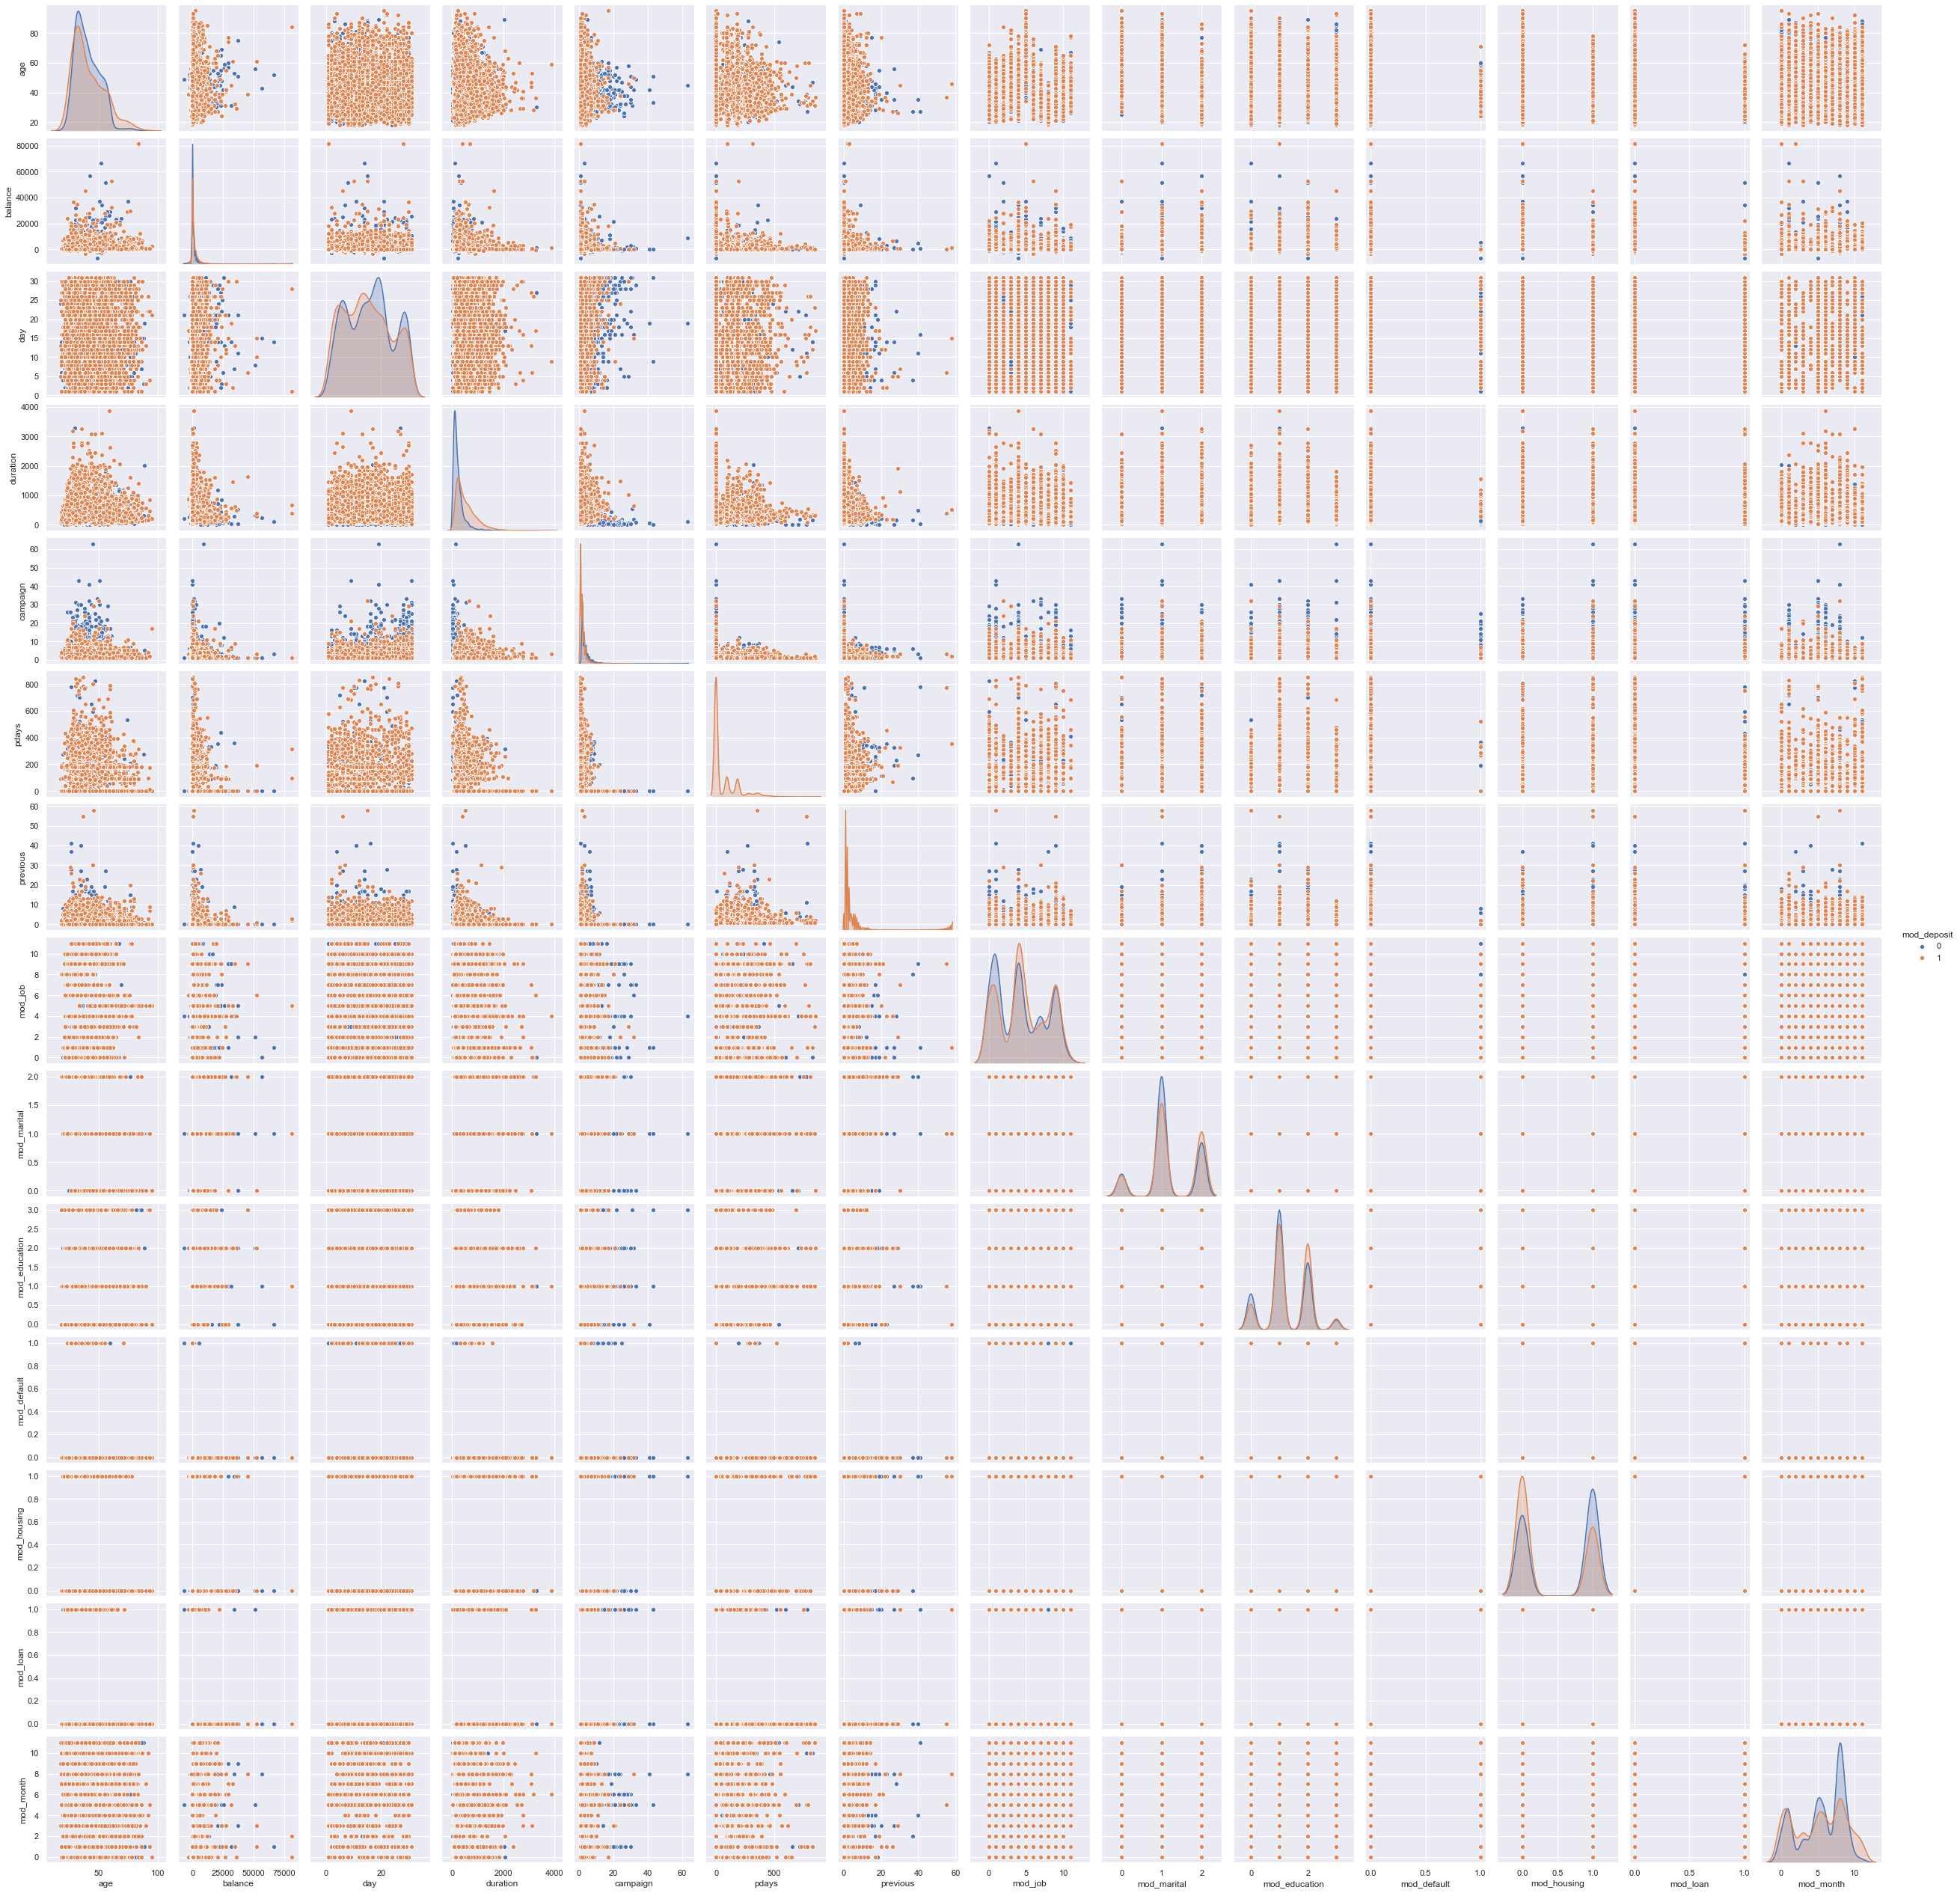

In [43]:
sns.pairplot(bank,hue='mod_deposit')

In [ ]:
#pd.get dummies and label encoder ,column transformer works as same 